## Распределение Лапласа

https://en.wikipedia.org/wiki/Laplace_distribution

Функция плотности: $f(x) = \frac{1}{2b}e^{-\frac{\left|x-\mu\right|}{b}}, -\infty<x<+\infty$

Математическое ожидание: $\mu$

Дисперсия: $2b^2$

Для задачи взял $b=2, \mu=0$

В коде $b$ называется scale, $\mu$ называется loc.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
import math
from __future__ import division


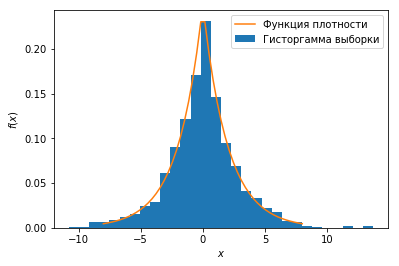

In [77]:
# Тренировка
# Параметры alpha и beta.
scale, loc = 2., 0.

# Получение выборки размером 1000 с помощью библиотечной функции.
s = np.random.laplace(loc, scale, 1000)

# Рисование гистограммы выборки.
count, bins, ignored = plt.hist(s, 30, normed=True, label=u'Гисторгамма выборки')
x = np.linspace(-8., 8.)

# Функция плотности распределения Лапласа.
norm_pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)

# Рисование функции плотности.
plt.plot(x, norm_pdf, label=u'Функция плотности')

# Оформления и показ диаграммы.
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

mu=2.000000, variance=8.000000, sigma=2.828427


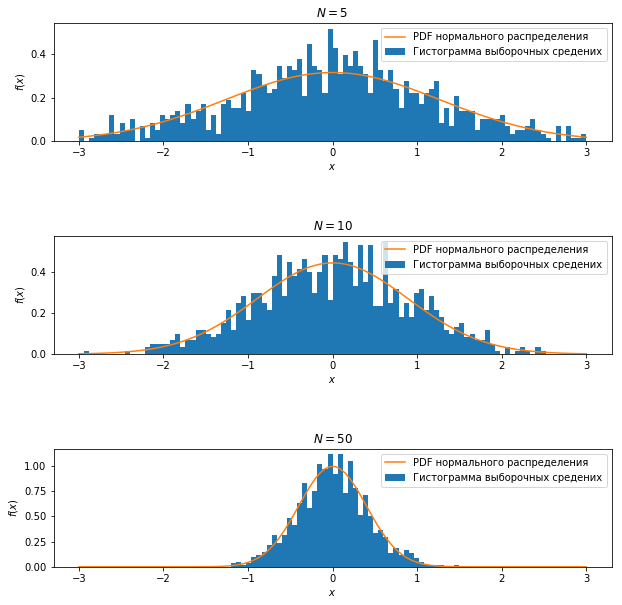

In [80]:
loc, scale = 0., 2.

# Размеры разбиений.
n_values = [5, 10, 50]

# Инифицализация диаграммы.
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.8)

# Математическое ожидание исходной величины (см. формулу в заголовке).
mu = loc

# Дисперсия исходной величины (см. формулу в заголовке).
variance = 2*(scale**2)

# Стандартное отклонение.
#sigma = math.sqrt(variance)

# Массив точек на оси x.
x = np.linspace(-3, 3, 100)

print(r'mu=%f, variance=%f, sigma=%f' % (scale, variance, sigma))

for n_index in range(len(n_values)):
    # Текущий размер разбиения.
    n = n_values[n_index]
    
    # Массив средних выборочных для текущего разбиения.
    s_means_n = []
    for s_index in range(1000):
        # Получение среднего выборки размером n.
        s_means_n.append(np.random.laplace(loc, scale, n).mean())

    # Математическое ожидание нормального распределения по ЦПТ.
    norm_mu = mu
    
    # Дисперсия исходной нормального распределения по ЦПТ.
    norm_variance = variance/n
    
    # Стандартное отклонение для нормального распределения.
    norm_sigma = math.sqrt(norm_variance)

    # Добавление диаграммы в (n_index + 1)-ю строку.
    plt.subplot(3, 1, n_index + 1)
    
    # Рисование гистрограммы выборочных средних текущего разбиения.
    plt.hist(s_means_n, 100, normed=True, range=[-3,3],
             label=u'Гистограмма выборочных средених')
    
    # Рисование нормального распределения
    plt.plot(x, mlab.normpdf(x, norm_mu, norm_sigma), label=u'PDF нормального распределения')
   
    # Приведение диаграммы к нужному виду. 
    plt.legend()
    plt.title(r"$N = %i$" % n)
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    
plt.show()  

## Вывод
Гистограмма в каждой секции показывает распеределение средней величины заданного объема N непрерывного распределения Лапласа. При увеличении объема выборки N распределение начинает сужаться, начиная походить на функцию Гаусса, что согласуется с утверждением центральной предельной теоремы. 